## Importing libraries and reading dataset

In [1]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import seaborn as sns
from pyspark.sql.functions import col, min, max, avg, lit, count

In [2]:
spark = SparkSession.builder.appName("Amazon Customer Behavior Survey").\
config("spark.memory.offHeap.enabled","true").\
config("spark.memory.offHeap.size","10g").getOrCreate()

In [3]:
print(spark.version)

3.4.1


In [4]:
df = spark.read.csv('Amazon Customer Behavior Survey.csv',header=True,inferSchema=True)

In [5]:
df.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Purchase_Frequency: string (nullable = true)
 |-- Purchase_Categories: string (nullable = true)
 |-- Personalized_Recommendation_Frequency5: string (nullable = true)
 |-- Browsing_Frequency: string (nullable = true)
 |-- Product_Search_Method: string (nullable = true)
 |-- Search_Result_Exploration: string (nullable = true)
 |-- Customer_Reviews_Importance: integer (nullable = true)
 |-- Add_to_Cart_Browsing: string (nullable = true)
 |-- Cart_Completion_Frequency: string (nullable = true)
 |-- Cart_Abandonment_Factors: string (nullable = true)
 |-- Saveforlater_Frequency: string (nullable = true)
 |-- Review_Left: string (nullable = true)
 |-- Review_Reliability: string (nullable = true)
 |-- Review_Helpfulness: string (nullable = true)
 |-- Personalized_Recommendation_Frequency17: integer (nullable = true)
 |-- Recommendation_Helpfulness: string (nullable = tru

In [6]:
type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
df.columns

['Timestamp',
 'age',
 'Gender',
 'Purchase_Frequency',
 'Purchase_Categories',
 'Personalized_Recommendation_Frequency5',
 'Browsing_Frequency',
 'Product_Search_Method',
 'Search_Result_Exploration',
 'Customer_Reviews_Importance',
 'Add_to_Cart_Browsing',
 'Cart_Completion_Frequency',
 'Cart_Abandonment_Factors',
 'Saveforlater_Frequency',
 'Review_Left',
 'Review_Reliability',
 'Review_Helpfulness',
 'Personalized_Recommendation_Frequency17',
 'Recommendation_Helpfulness',
 'Rating_Accuracy',
 'Shopping_Satisfaction',
 'Service_Appreciation',
 'Improvement_Areas']

In [8]:
df.head(5)

[Row(Timestamp='2023/06/04 1:28:19 PM GMT+5:30', age=23, Gender='Female', Purchase_Frequency='Few times a month', Purchase_Categories='Beauty and Personal Care', Personalized_Recommendation_Frequency5='Yes', Browsing_Frequency='Few times a week', Product_Search_Method='Keyword', Search_Result_Exploration='Multiple pages', Customer_Reviews_Importance=1, Add_to_Cart_Browsing='Yes', Cart_Completion_Frequency='Sometimes', Cart_Abandonment_Factors='Found a better price elsewhere', Saveforlater_Frequency='Sometimes', Review_Left='Yes', Review_Reliability='Occasionally', Review_Helpfulness='Yes', Personalized_Recommendation_Frequency17=2, Recommendation_Helpfulness='Yes', Rating_Accuracy=1, Shopping_Satisfaction=1, Service_Appreciation='Competitive prices', Improvement_Areas='Reducing packaging waste'),
 Row(Timestamp='2023/06/04 2:30:44 PM GMT+5:30', age=23, Gender='Female', Purchase_Frequency='Once a month', Purchase_Categories='Clothing and Fashion', Personalized_Recommendation_Frequency5=

In [9]:
df.describe().show()

+-------+--------------------+------------------+-----------------+------------------+--------------------+--------------------------------------+------------------+---------------------+-------------------------+---------------------------+--------------------+-------------------------+------------------------+----------------------+-----------+------------------+------------------+---------------------------------------+--------------------------+------------------+---------------------+--------------------+--------------------+
|summary|           Timestamp|               age|           Gender|Purchase_Frequency| Purchase_Categories|Personalized_Recommendation_Frequency5|Browsing_Frequency|Product_Search_Method|Search_Result_Exploration|Customer_Reviews_Importance|Add_to_Cart_Browsing|Cart_Completion_Frequency|Cart_Abandonment_Factors|Saveforlater_Frequency|Review_Left|Review_Reliability|Review_Helpfulness|Personalized_Recommendation_Frequency17|Recommendation_Helpfulness|   Rating_

In [10]:
df.dtypes

[('Timestamp', 'string'),
 ('age', 'int'),
 ('Gender', 'string'),
 ('Purchase_Frequency', 'string'),
 ('Purchase_Categories', 'string'),
 ('Personalized_Recommendation_Frequency5', 'string'),
 ('Browsing_Frequency', 'string'),
 ('Product_Search_Method', 'string'),
 ('Search_Result_Exploration', 'string'),
 ('Customer_Reviews_Importance', 'int'),
 ('Add_to_Cart_Browsing', 'string'),
 ('Cart_Completion_Frequency', 'string'),
 ('Cart_Abandonment_Factors', 'string'),
 ('Saveforlater_Frequency', 'string'),
 ('Review_Left', 'string'),
 ('Review_Reliability', 'string'),
 ('Review_Helpfulness', 'string'),
 ('Personalized_Recommendation_Frequency17', 'int'),
 ('Recommendation_Helpfulness', 'string'),
 ('Rating_Accuracy', 'int'),
 ('Shopping_Satisfaction', 'int'),
 ('Service_Appreciation', 'string'),
 ('Improvement_Areas', 'string')]

In [11]:
## Selecting a particular column
df.select('age').show(5)

+---+
|age|
+---+
| 23|
| 23|
| 24|
| 24|
| 22|
+---+
only showing top 5 rows



In [12]:
## Selecting more than one columns
df.select('age','Gender').show()

+---+-----------------+
|age|           Gender|
+---+-----------------+
| 23|           Female|
| 23|           Female|
| 24|Prefer not to say|
| 24|           Female|
| 22|           Female|
| 21|           Female|
| 22|           Female|
| 21|           Female|
| 20|           Female|
| 23|           Female|
| 22|           Female|
| 25|           Female|
| 23|           Female|
| 24|           Female|
| 21|           Female|
| 23|           Female|
| 16|             Male|
| 21|           Female|
| 23|           Female|
| 25|           Female|
+---+-----------------+
only showing top 20 rows



In [13]:
## Describing the Dataframe
df.show()

+--------------------+---+-----------------+--------------------+--------------------+--------------------------------------+------------------+---------------------+-------------------------+---------------------------+--------------------+-------------------------+------------------------+----------------------+-----------+------------------+------------------+---------------------------------------+--------------------------+---------------+---------------------+--------------------+--------------------+
|           Timestamp|age|           Gender|  Purchase_Frequency| Purchase_Categories|Personalized_Recommendation_Frequency5|Browsing_Frequency|Product_Search_Method|Search_Result_Exploration|Customer_Reviews_Importance|Add_to_Cart_Browsing|Cart_Completion_Frequency|Cart_Abandonment_Factors|Saveforlater_Frequency|Review_Left|Review_Reliability|Review_Helpfulness|Personalized_Recommendation_Frequency17|Recommendation_Helpfulness|Rating_Accuracy|Shopping_Satisfaction|Service_Appreciat

## Dropping null values

In [14]:
## Deleting the null values
df.na.drop().show()

+--------------------+---+-----------------+--------------------+--------------------+--------------------------------------+------------------+---------------------+-------------------------+---------------------------+--------------------+-------------------------+------------------------+----------------------+-----------+------------------+------------------+---------------------------------------+--------------------------+---------------+---------------------+--------------------+--------------------+
|           Timestamp|age|           Gender|  Purchase_Frequency| Purchase_Categories|Personalized_Recommendation_Frequency5|Browsing_Frequency|Product_Search_Method|Search_Result_Exploration|Customer_Reviews_Importance|Add_to_Cart_Browsing|Cart_Completion_Frequency|Cart_Abandonment_Factors|Saveforlater_Frequency|Review_Left|Review_Reliability|Review_Helpfulness|Personalized_Recommendation_Frequency17|Recommendation_Helpfulness|Rating_Accuracy|Shopping_Satisfaction|Service_Appreciat

In [15]:
## Counting the number of rows after deleting the null values
df.count()

602

In [16]:
## Checking customer demographics
## Customers younger than 25 or are 25 years old
df.filter('age<=20').count()

29

## Filtering based on conditions

In [17]:
## Check the interests of young customers
df.filter('age<=20').select(['Purchase_Frequency','Purchase_Categories']).show()

+--------------------+--------------------+
|  Purchase_Frequency| Purchase_Categories|
+--------------------+--------------------+
|Less than once a ...|Beauty and Person...|
|   Few times a month|Clothing and Fash...|
|Less than once a ...|Clothing and Fashion|
|   Few times a month|Clothing and Fashion|
|Multiple times a ...|Beauty and Person...|
|Multiple times a ...|Groceries and Gou...|
|         Once a week|Groceries and Gou...|
|   Few times a month|Beauty and Person...|
|        Once a month|Beauty and Person...|
|   Few times a month|Groceries and Gou...|
|        Once a month|    Home and Kitchen|
|        Once a month|Clothing and Fash...|
|   Few times a month|Clothing and Fashion|
|   Few times a month|Clothing and Fash...|
|        Once a month|Clothing and Fash...|
|   Few times a month|Groceries and Gou...|
|        Once a month|Clothing and Fashion|
|Less than once a ...|Clothing and Fash...|
|         Once a week|Beauty and Person...|
|   Few times a month|Beauty and

In [18]:
## Checking customer demographics
## Customers older 60 or are 60 years old
df.filter('age>=60').count()

8

In [19]:
## Checking the interests of elder customers
df.filter('age>=60').select(['Purchase_Frequency','Purchase_Categories']).show()

+--------------------+--------------------+
|  Purchase_Frequency| Purchase_Categories|
+--------------------+--------------------+
|         Once a week|Groceries and Gou...|
|Less than once a ...|Beauty and Person...|
|Less than once a ...|Groceries and Gou...|
|         Once a week|Beauty and Person...|
|   Few times a month|Beauty and Person...|
|   Few times a month|    Home and Kitchen|
|Less than once a ...|Home and Kitchen;...|
|         Once a week|Beauty and Person...|
+--------------------+--------------------+



In [20]:
## Major population demographic in this dataset
## Customers in between 25 and 60
df.filter('age>20 AND age<60').count()

565

In [21]:
## Checking the interests of the major demographic population
df.filter('age>20 AND age<60').select(['Purchase_Frequency','Purchase_Categories']).show()

+--------------------+--------------------+
|  Purchase_Frequency| Purchase_Categories|
+--------------------+--------------------+
|   Few times a month|Beauty and Person...|
|        Once a month|Clothing and Fashion|
|   Few times a month|Groceries and Gou...|
|        Once a month|Beauty and Person...|
|Less than once a ...|Beauty and Person...|
|Less than once a ...|Clothing and Fashion|
|Less than once a ...|Clothing and Fashion|
|   Few times a month|Beauty and Person...|
|Less than once a ...|Beauty and Person...|
|Less than once a ...|Clothing and Fashion|
|Multiple times a ...|Beauty and Person...|
|Less than once a ...|Beauty and Person...|
|        Once a month|Clothing and Fash...|
|Less than once a ...|Beauty and Person...|
|Less than once a ...|              others|
|Less than once a ...|Clothing and Fashion|
|   Few times a month|Beauty and Person...|
|Less than once a ...|Beauty and Person...|
|        Once a month|Clothing and Fashion|
|Less than once a ...|          

In [22]:
## Customer review importance more than or equal to 4
df.filter('Customer_Reviews_Importance>=4').count()

102

In [23]:
## Rating accuracy more than or equal to 4
df.filter('Shopping_Satisfaction>=4').count()

84

In [24]:
df.select('Purchase_Categories').distinct().count()

29

In [25]:
df.select('Improvement_Areas').distinct().count()

18

## Grouping some key columns

In [26]:
## Distinct values of Purchase categories
df.groupBy('Purchase_Categories').count().show()

+--------------------+-----+
| Purchase_Categories|count|
+--------------------+-----+
|Clothing and Fash...|   16|
|Groceries and Gou...|    4|
|Groceries and Gou...|    1|
|Groceries and Gou...|   14|
|Beauty and Person...|    7|
|Clothing and Fashion|  106|
|Beauty and Person...|    8|
|Groceries and Gou...|    3|
|              others|   48|
|Groceries and Gou...|    7|
|Home and Kitchen;...|    9|
|Beauty and Person...|   46|
|Groceries and Gou...|    4|
|Groceries and Gou...|   14|
|Beauty and Person...|   42|
|Groceries and Gou...|    6|
|    Home and Kitchen|   24|
|Groceries and Gou...|    2|
|Groceries and Gou...|    3|
|Beauty and Person...|   21|
+--------------------+-----+
only showing top 20 rows



In [27]:
df.select('Cart_Abandonment_Factors').distinct().count()

4

In [28]:
## Distinct values of Cart Abandonment Factors
df.groupBy('Cart_Abandonment_Factors').count().show()

+------------------------+-----+
|Cart_Abandonment_Factors|count|
+------------------------+-----+
|                  others|   36|
|     High shipping costs|   70|
|    Changed my mind o...|  241|
|    Found a better pr...|  255|
+------------------------+-----+



In [29]:
df.select('Purchase_Frequency').distinct().count()

5

In [30]:
## Distinct values of Purchase Frequency
df.groupBy('Purchase_Frequency').count().show()

+--------------------+-----+
|  Purchase_Frequency|count|
+--------------------+-----+
|Multiple times a ...|   56|
|         Once a week|  112|
|   Few times a month|  203|
|Less than once a ...|  124|
|        Once a month|  107|
+--------------------+-----+



In [31]:
## Checking which category got more shopping satisfaction by taking the average
(df.groupBy('Purchase_Categories').agg(avg('Shopping_satisfaction').alias('Shopping_satisfaction')).\
sort('Shopping_satisfaction')).show(truncate=True)

+--------------------+---------------------+
| Purchase_Categories|Shopping_satisfaction|
+--------------------+---------------------+
|Groceries and Gou...|                  1.0|
|Groceries and Gou...|                 1.25|
|Groceries and Gou...|   1.3333333333333333|
|Groceries and Gou...|                  1.7|
|Beauty and Person...|   1.7142857142857142|
|Groceries and Gou...|               1.9375|
|Groceries and Gou...|                  2.0|
|Groceries and Gou...|                  2.0|
|Groceries and Gou...|                  2.0|
|Beauty and Person...|   2.0833333333333335|
|Groceries and Gou...|    2.142857142857143|
|    Home and Kitchen|   2.1666666666666665|
|Groceries and Gou...|   2.1666666666666665|
|Groceries and Gou...|                  2.2|
|Beauty and Person...|    2.238095238095238|
|Beauty and Person...|   2.2857142857142856|
|Beauty and Person...|   2.3260869565217392|
|Beauty and Person...|                  2.4|
|Clothing and Fash...|   2.5555555555555554|
|Clothing 

In [32]:
## Checking most popular reasons for cart abandonment
#df.groupBy('Cart_Abandonment_Factors').count().orderBy(desc('count')).show()

In [33]:
## Count of different values for whether the recommendation is helpful
df.select('Recommendation_Helpfulness').distinct().count()

3

In [34]:
## Distinct values of Recommendation helpfulness
df.groupBy('Recommendation_Helpfulness').count().show()

+--------------------------+-----+
|Recommendation_Helpfulness|count|
+--------------------------+-----+
|                 Sometimes|  273|
|                        No|  172|
|                       Yes|  157|
+--------------------------+-----+



In [35]:
#df.stat.corr('Rating_Accuracy ','Shopping_Satisfaction')

## Describing the dataset by selecting the integer values

In [36]:
## Printing the integer values
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().show()

+-------+------------------+---------------------------+---------------------------------------+------------------+---------------------+
|summary|               age|Customer_Reviews_Importance|Personalized_Recommendation_Frequency17|   Rating_Accuracy|Shopping_Satisfaction|
+-------+------------------+---------------------------+---------------------------------------+------------------+---------------------+
|  count|               602|                        602|                                    602|               602|                  602|
|   mean|30.790697674418606|         2.4800664451827243|                     2.6993355481727574|2.6727574750830563|    2.463455149501661|
| stddev|10.193275972581427|         1.1852257431111726|                     1.0420283993524453|0.8997441146602887|   1.0121524594380453|
|    min|                 3|                          1|                                      1|                 1|                    1|
|    max|                67|      

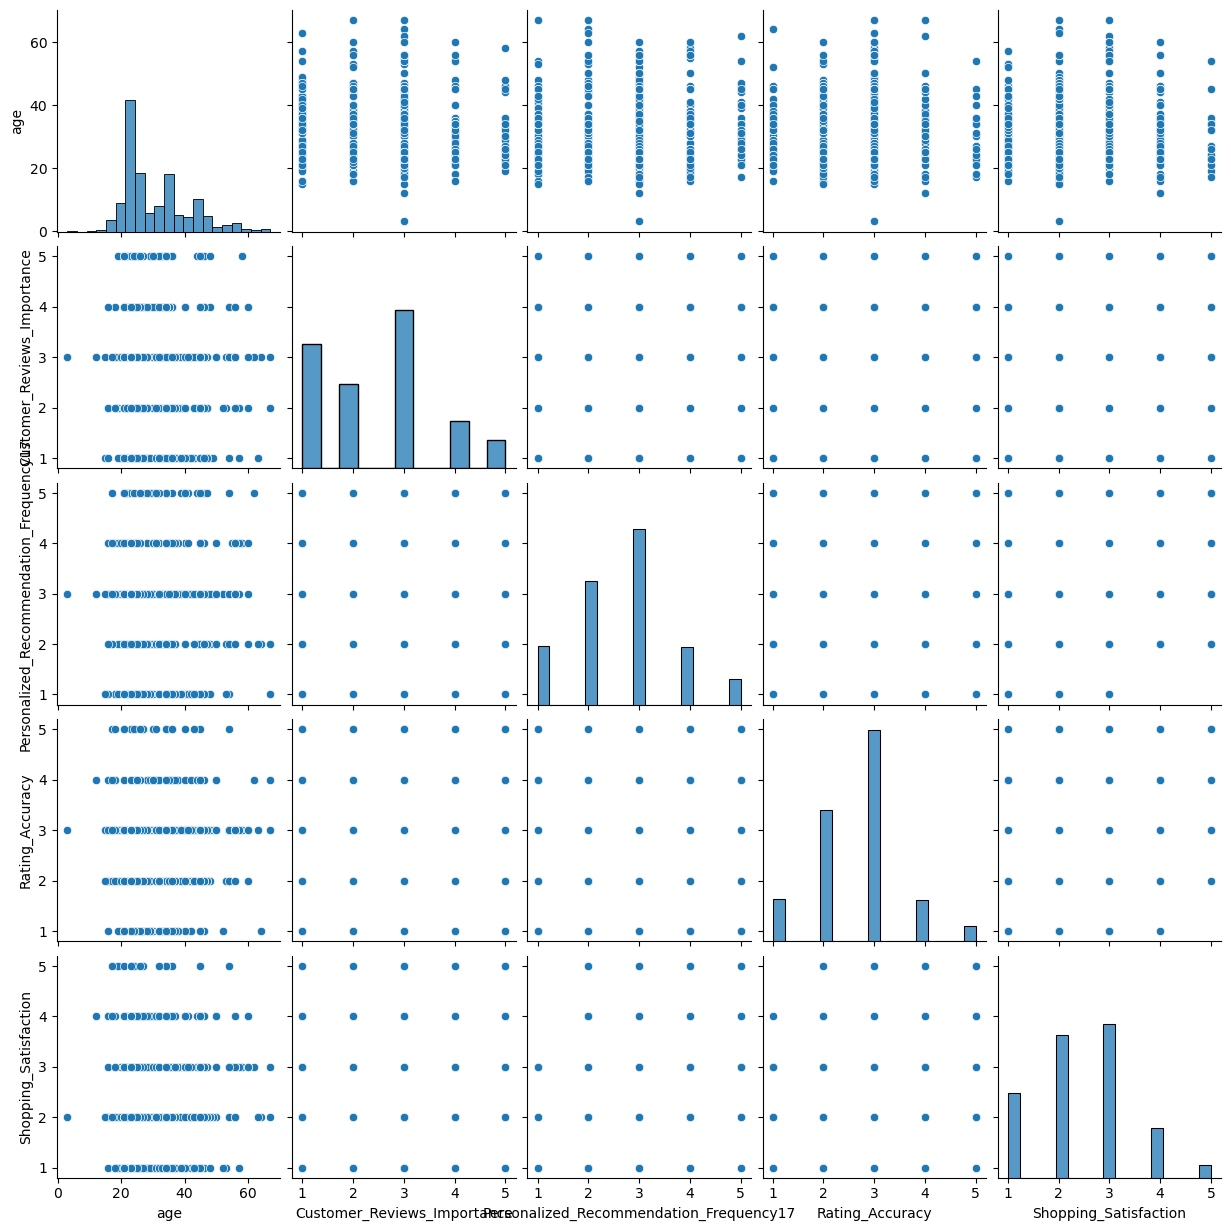

In [37]:
df2 = df.toPandas()
sns.pairplot(df2)

In [38]:
df2.corr()

C:\Users\devad\AppData\Local\Temp\ipykernel_28988\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency17,Rating_Accuracy,Shopping_Satisfaction
age,1.000000,0.077193,-0.018937,-0.010202,0.003934
Customer_Reviews_Importance,0.077193,1.000000,0.313761,0.314513,0.402317
Personalized_Recommendation_Frequency17,-0.018937,0.313761,1.000000,0.437943,0.438395
Rating_Accuracy,-0.010202,0.314513,0.437943,1.000000,0.513962
Shopping_Satisfaction,0.003934,0.402317,0.438395,0.513962,1.000000


In [39]:
## There is no unrealistic correlation. So the dataset is good

## Importing String Indexer to Convert categorical values to numerical

In [40]:
from pyspark.ml.feature import StringIndexer

In [41]:
## Python function to feed values so that they can be converted to numeric values easily
dataframe_columns = df.columns
dataframe_non_cat = ['Timestamp','age','Customer_Reviews_Importance','Personalized_Recommendation_Frequency','Rating_Accuracy',
                    'Shopping_Satisfaction']
for x in dataframe_columns:
    if x not in dataframe_non_cat:
        df = StringIndexer(
        inputCol= x,
        outputCol= x+'_Indexed',
        handleInvalid='keep').fit(df).transform(df)

In [42]:
df.show(5)

+--------------------+---+-----------------+--------------------+--------------------+--------------------------------------+------------------+---------------------+-------------------------+---------------------------+--------------------+-------------------------+------------------------+----------------------+-----------+------------------+------------------+---------------------------------------+--------------------------+---------------+---------------------+--------------------+--------------------+--------------+--------------------------+---------------------------+----------------------------------------------+--------------------------+-----------------------------+---------------------------------+----------------------------+---------------------------------+--------------------------------+------------------------------+-------------------+--------------------------+--------------------------+-----------------------------------------------+-------------------------------

In [43]:
print(df.columns)

['Timestamp', 'age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency5', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency17', 'Recommendation_Helpfulness', 'Rating_Accuracy', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas', 'Gender_Indexed', 'Purchase_Frequency_Indexed', 'Purchase_Categories_Indexed', 'Personalized_Recommendation_Frequency5_Indexed', 'Browsing_Frequency_Indexed', 'Product_Search_Method_Indexed', 'Search_Result_Exploration_Indexed', 'Add_to_Cart_Browsing_Indexed', 'Cart_Completion_Frequency_Indexed', 'Cart_Abandonment_Factors_Indexed', 'Saveforlater_Frequency_Indexed', 'Review_Left_Indexed', 'Review_Reliability_Indexed', 'Review_Helpfulness_Indexe

## Dropping categorical columns that have been converted to numeric values

In [44]:
columns_to_drop = ["Timestamp","Gender","Purchase_Frequency","Purchase_Categories","Personalized_Recommendation_Frequency5",\
        "Browsing_Frequency","Product_Search_Method","Search_Result_Exploration","Add_to_Cart_Browsing",\
        "Cart_Completion_Frequency","Cart_Abandonment_Factors","Saveforlater_Frequency","Review_Left","Review_Reliability",\
       "Review_Helpfulness","Personalized_Recommendation_Frequency17","Recommendation_Helpfulness",\
       "Service_Appreciation","Improvement_Areas","Purchase_Categories_Indexed","Improvement_Areas_Indexed"]
df = df.drop(*columns_to_drop)

In [45]:
df.show()

+---+---------------------------+---------------+---------------------+--------------+--------------------------+----------------------------------------------+--------------------------+-----------------------------+---------------------------------+----------------------------+---------------------------------+--------------------------------+------------------------------+-------------------+--------------------------+--------------------------+-----------------------------------------------+----------------------------------+----------------------------+
|age|Customer_Reviews_Importance|Rating_Accuracy|Shopping_Satisfaction|Gender_Indexed|Purchase_Frequency_Indexed|Personalized_Recommendation_Frequency5_Indexed|Browsing_Frequency_Indexed|Product_Search_Method_Indexed|Search_Result_Exploration_Indexed|Add_to_Cart_Browsing_Indexed|Cart_Completion_Frequency_Indexed|Cart_Abandonment_Factors_Indexed|Saveforlater_Frequency_Indexed|Review_Left_Indexed|Review_Reliability_Indexed|Review_Hel

In [46]:
## Trasformed columns
df.columns

['age',
 'Customer_Reviews_Importance',
 'Rating_Accuracy',
 'Shopping_Satisfaction',
 'Gender_Indexed',
 'Purchase_Frequency_Indexed',
 'Personalized_Recommendation_Frequency5_Indexed',
 'Browsing_Frequency_Indexed',
 'Product_Search_Method_Indexed',
 'Search_Result_Exploration_Indexed',
 'Add_to_Cart_Browsing_Indexed',
 'Cart_Completion_Frequency_Indexed',
 'Cart_Abandonment_Factors_Indexed',
 'Saveforlater_Frequency_Indexed',
 'Review_Left_Indexed',
 'Review_Reliability_Indexed',
 'Review_Helpfulness_Indexed',
 'Personalized_Recommendation_Frequency17_Indexed',
 'Recommendation_Helpfulness_Indexed',
 'Service_Appreciation_Indexed']

In [47]:
## Use VectorAssembler to assemble all the features
from pyspark.ml.feature import VectorAssembler

In [48]:
features_required = ['age',
 'Customer_Reviews_Importance',
 'Rating_Accuracy',
 'Shopping_Satisfaction',
 'Gender_Indexed',
 'Purchase_Frequency_Indexed',
 'Personalized_Recommendation_Frequency5_Indexed',
 'Browsing_Frequency_Indexed',
 'Product_Search_Method_Indexed',
 'Search_Result_Exploration_Indexed',
 'Add_to_Cart_Browsing_Indexed',
 'Cart_Completion_Frequency_Indexed',
 'Cart_Abandonment_Factors_Indexed',
 'Saveforlater_Frequency_Indexed',
 'Review_Left_Indexed',
 'Review_Reliability_Indexed',
 'Review_Helpfulness_Indexed',
 'Personalized_Recommendation_Frequency17_Indexed',
 'Service_Appreciation_Indexed']
assembler = VectorAssembler(inputCols=features_required,outputCol='features_temp')
transformed_data_temp = assembler.transform(df)

In [49]:
transformed_data_temp.show(5)

+---+---------------------------+---------------+---------------------+--------------+--------------------------+----------------------------------------------+--------------------------+-----------------------------+---------------------------------+----------------------------+---------------------------------+--------------------------------+------------------------------+-------------------+--------------------------+--------------------------+-----------------------------------------------+----------------------------------+----------------------------+--------------------+
|age|Customer_Reviews_Importance|Rating_Accuracy|Shopping_Satisfaction|Gender_Indexed|Purchase_Frequency_Indexed|Personalized_Recommendation_Frequency5_Indexed|Browsing_Frequency_Indexed|Product_Search_Method_Indexed|Search_Result_Exploration_Indexed|Add_to_Cart_Browsing_Indexed|Cart_Completion_Frequency_Indexed|Cart_Abandonment_Factors_Indexed|Saveforlater_Frequency_Indexed|Review_Left_Indexed|Review_Reliabili

In [50]:
finalized_raw_data = transformed_data_temp.select("Recommendation_Helpfulness_Indexed", "features_temp")
finalized_raw_data.show()

+----------------------------------+--------------------+
|Recommendation_Helpfulness_Indexed|       features_temp|
+----------------------------------+--------------------+
|                               2.0|(19,[0,1,2,3,6,8,...|
|                               0.0|[23.0,1.0,3.0,2.0...|
|                               1.0|[24.0,2.0,3.0,3.0...|
|                               0.0|(19,[0,1,2,3,5,6,...|
|                               2.0|[22.0,1.0,2.0,2.0...|
|                               1.0|[21.0,1.0,5.0,2.0...|
|                               0.0|[22.0,1.0,3.0,3.0...|
|                               0.0|[21.0,1.0,1.0,3.0...|
|                               2.0|[20.0,1.0,2.0,2.0...|
|                               2.0|[23.0,1.0,3.0,4.0...|
|                               0.0|(19,[0,1,2,3,5,7,...|
|                               2.0|(19,[0,1,2,3,5,8,...|
|                               1.0|[23.0,1.0,3.0,2.0...|
|                               2.0|[24.0,1.0,2.0,2.0...|
|             

In [51]:
## Renaming Target column for ease of use
transformed_data = finalized_raw_data.withColumnRenamed("Recommendation_Helpfulness_Indexed", "label")
transformed_data.columns

['label', 'features_temp']

In [52]:
transformed_data.show()

+-----+--------------------+
|label|       features_temp|
+-----+--------------------+
|  2.0|(19,[0,1,2,3,6,8,...|
|  0.0|[23.0,1.0,3.0,2.0...|
|  1.0|[24.0,2.0,3.0,3.0...|
|  0.0|(19,[0,1,2,3,5,6,...|
|  2.0|[22.0,1.0,2.0,2.0...|
|  1.0|[21.0,1.0,5.0,2.0...|
|  0.0|[22.0,1.0,3.0,3.0...|
|  0.0|[21.0,1.0,1.0,3.0...|
|  2.0|[20.0,1.0,2.0,2.0...|
|  2.0|[23.0,1.0,3.0,4.0...|
|  0.0|(19,[0,1,2,3,5,7,...|
|  2.0|(19,[0,1,2,3,5,8,...|
|  1.0|[23.0,1.0,3.0,2.0...|
|  2.0|[24.0,1.0,2.0,2.0...|
|  0.0|[21.0,1.0,3.0,1.0...|
|  0.0|[23.0,1.0,3.0,3.0...|
|  0.0|[16.0,1.0,3.0,2.0...|
|  2.0|[21.0,1.0,2.0,1.0...|
|  0.0|[23.0,1.0,3.0,2.0...|
|  0.0|[25.0,1.0,3.0,2.0...|
+-----+--------------------+
only showing top 20 rows



## Standardization to scale all the attributes to similar scale

In [53]:
from pyspark.mllib.util import MLUtils
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features_temp", outputCol="features",
                        withStd=True, withMean=False)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(transformed_data)

# Normalize each feature to have unit standard deviation.
scaledData = scalerModel.transform(transformed_data)

In [54]:
# Dropping features_temp column, because we already have features
scaledData = scaledData.drop('features_temp')
scaledData.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  2.0|(19,[0,1,2,3,6,8,...|
|  0.0|[2.25638941414585...|
|  1.0|[2.35449330171741...|
|  0.0|(19,[0,1,2,3,5,6,...|
|  2.0|[2.15828552657429...|
|  1.0|[2.06018163900273...|
|  0.0|[2.15828552657429...|
|  0.0|[2.06018163900273...|
|  2.0|[1.96207775143117...|
|  2.0|[2.25638941414585...|
|  0.0|(19,[0,1,2,3,5,7,...|
|  2.0|(19,[0,1,2,3,5,8,...|
|  1.0|[2.25638941414585...|
|  2.0|[2.35449330171741...|
|  0.0|[2.06018163900273...|
|  0.0|[2.25638941414585...|
|  0.0|[1.56966220114494...|
|  2.0|[2.06018163900273...|
|  0.0|[2.25638941414585...|
|  0.0|[2.45259718928896...|
+-----+--------------------+
only showing top 20 rows



## Model Training

## Supervised Learning - Random Forest, Decision Tree, Naive Bayes

## 1) Random Forest

In [55]:
(training_data, test_data) = scaledData.randomSplit([0.8,0.2])

In [56]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='label',
                           featuresCol='features',
                           maxDepth=5)

In [57]:
model = rf.fit(training_data)

In [58]:
## Predicting with the test dataset
predictions_rf = model.transform(test_data)
predictions_rf.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(19,[0,1,2,3,4,5,...|[8.91039529183633...|[0.44551976459181...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|[8.38218802044554...|[0.41910940102227...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|[8.74515215111429...|[0.43725760755571...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|[16.4229694731537...|[0.82114847365768...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|[12.9575486065791...|[0.64787743032895...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|[14.6239619992666...|[0.73119809996333...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|[16.5748462391624...|[0.82874231195812...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|[16.4229694731537...|[0.82114847365768...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|[16.6650154484526...|[0.83325077242263...|       0.0|
|  0.0|(19,[0,1,

In [59]:
## Measuring the accuracy and model evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

eval_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                  metricName="accuracy")
eval_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                   metricName="precisionByLabel")
eval_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                metricName="recallByLabel")
eval_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                            metricName="f1")

In [60]:
accuracy = eval_accuracy.evaluate(predictions_rf)
precision = eval_precision.evaluate(predictions_rf)
recall = eval_recall.evaluate(predictions_rf)
f1_score = eval_f1.evaluate(predictions_rf)

In [61]:
print('Accuracy: ',accuracy)
print('Precision ',precision)
print('Recall ',recall)
print('F1 Score ',f1_score)

Accuracy:  0.592
Precision  0.625
Recall  0.7894736842105263
F1 Score  0.5672354252946799


## 2) Decision tree

In [62]:
from pyspark.ml.classification import DecisionTreeClassifier

In [63]:
(training_data, test_data) = scaledData.randomSplit([0.8,0.2])
dtc = DecisionTreeClassifier(featuresCol="features", labelCol="label")
dtc = dtc.fit(training_data)

predictions_dt = dtc.transform(test_data)
predictions_dt.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(19,[0,1,2,3,4,5,...|   [6.0,2.0,4.0,0.0]|[0.5,0.1666666666...|       0.0|
|  0.0|(19,[0,1,2,3,4,5,...|  [11.0,5.0,0.0,0.0]|[0.6875,0.3125,0....|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|  [79.0,6.0,7.0,0.0]|[0.85869565217391...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|[34.0,12.0,18.0,0.0]|[0.53125,0.1875,0...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|  [79.0,6.0,7.0,0.0]|[0.85869565217391...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|  [79.0,6.0,7.0,0.0]|[0.85869565217391...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|  [79.0,6.0,7.0,0.0]|[0.85869565217391...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|  [79.0,6.0,7.0,0.0]|[0.85869565217391...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|  [79.0,6.0,7.0,0.0]|[0.85869565217391...|       0.0|
|  0.0|(19,[0,1,

In [64]:
eval_accuracy2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                  metricName="accuracy")
eval_precision2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                   metricName="precisionByLabel")
eval_recall2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                metricName="recallByLabel")
eval_f12 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                            metricName="f1")
 

In [65]:
accuracy2 = eval_accuracy2.evaluate(predictions_dt)
precision2 = eval_precision2.evaluate(predictions_dt)
recall2 = eval_recall2.evaluate(predictions_dt)
f1_score2 = eval_f12.evaluate(predictions_dt)

In [66]:
print('Accuracy: ',accuracy2)
print('Precision ',precision2)
print('Recall ',recall2)
print('F1 Score ',f1_score2)

Accuracy:  0.5869565217391305
Precision  0.6935483870967742
Recall  0.6142857142857143
F1 Score  0.5931598594642072


## 3) Naive Bayes

In [67]:
from pyspark.ml.classification import NaiveBayes
# Split the data into train and test
splits = scaledData.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model
model = nb.fit(train)

# select example rows to display.
predictions_nb = model.transform(test)
predictions_nb.show()

# compute accuracy on the test set
eval_accuracy3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                  metricName="accuracy")
eval_precision3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                   metricName="precisionByLabel")
eval_recall3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                metricName="recallByLabel")
eval_f13 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                            metricName="f1")

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(19,[0,1,2,3,4,5,...|[-52.777256464012...|[0.52400686043833...|       0.0|
|  0.0|(19,[0,1,2,3,4,5,...|[-52.817292317270...|[0.88029218294726...|       0.0|
|  0.0|(19,[0,1,2,3,4,5,...|[-61.085032682496...|[0.83804355014634...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|[-68.315484616956...|[0.81765995859611...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|[-49.775724338969...|[0.85783360767278...|       0.0|
|  0.0|(19,[0,1,2,3,4,6,...|[-58.054184275235...|[0.68201703908256...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|[-39.085044044763...|[0.84453269578272...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|[-52.537712758445...|[0.77468669311221...|       0.0|
|  0.0|(19,[0,1,2,3,5,6,...|[-50.667086762143...|[0.82853419107434...|       0.0|
|  0.0|(19,[0,1,

In [68]:
accuracy3 = eval_accuracy3.evaluate(predictions_nb)
precision3 = eval_precision3.evaluate(predictions_nb)
recall3 = eval_recall3.evaluate(predictions_nb)
f1_score3 = eval_f13.evaluate(predictions_nb)

In [69]:
print('Accuracy: ',accuracy3)
print('Precision ',precision3)
print('Recall ',recall3)
print('F1 Score ',f1_score3)

Accuracy:  0.5210084033613446
Precision  0.5925925925925926
Recall  0.5517241379310345
F1 Score  0.5237325786809335


## Unsupervised Learning - K-Means Clustering

## 4) K-Means Clustering

In [70]:
# Importing K-Means Clustering

In [71]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [72]:
silhouette_score=[]
  
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='features', \
                                metricName='silhouette', 
                                distanceMeasure='squaredEuclidean')
  
for i in range(2,10):
    kmeans=KMeans(featuresCol='features', k=i)
    model=kmeans.fit(scaledData)
    predictions=model.transform(scaledData)
    score=evaluator.evaluate(predictions)
    silhouette_score.append(score)
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.17301858097275283
Silhouette Score for k = 3 is 0.14319203252532858
Silhouette Score for k = 4 is 0.11623920121844479
Silhouette Score for k = 5 is 0.13867524847147222
Silhouette Score for k = 6 is 0.1308171412555711
Silhouette Score for k = 7 is 0.11922713800538673
Silhouette Score for k = 8 is 0.10562804582483168
Silhouette Score for k = 9 is 0.09659620833523719


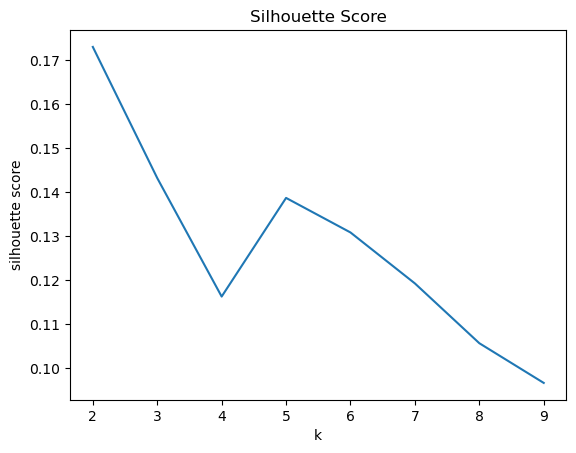

In [73]:
# Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt

plt.plot(range(2,10),silhouette_score)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score')
plt.show()


In [74]:
# Select K=4 where the value of Silhouette Score is maximum

In [75]:
# Training of K-Means model.
kmeans = KMeans(featuresCol='features',k=4)
model = kmeans.fit(scaledData)
predictions_kmeans = model.transform(scaledData)

In [76]:
# Cluster centers
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[3.12180585 2.48295075 3.14772035 2.78049585 0.81215712 1.02659869
 1.09303223 0.58094559 0.9717316  0.68663391 0.88797253 0.52012548
 0.78199555 0.51720246 0.79255271 0.79305797 1.55324917 0.54260868
 0.62552702]
[3.10616252 3.12533319 4.05436086 3.28403457 1.04549745 0.97580634
 0.92899777 1.76973559 1.61837125 1.1149979  1.28160984 1.87393497
 1.648024   1.55659155 1.40790991 2.07200357 1.2943743  2.1058991
 1.43481047]
[3.01392204 1.32794369 2.22285422 1.52065079 0.82990419 1.32027229
 1.9845008  0.79617225 1.1499862  0.25568772 0.99185457 0.83644442
 0.76562527 1.10683694 0.59107731 1.13441771 0.50649429 1.12541059
 1.33652979]
[2.77359888 1.39586216 2.67232842 2.04863348 0.34654677 1.10014837
 0.17459693 1.38944015 0.83691438 0.44904432 1.30045705 0.72711805
 1.04777181 1.18252018 1.42592287 1.10892052 0.48539036 0.98709858
 1.77407874]


In [77]:
predictions_kmeans.select('prediction').show()

+----------+
|prediction|
+----------+
|         2|
|         2|
|         0|
|         0|
|         2|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         2|
|         3|
|         3|
|         3|
|         3|
|         3|
+----------+
only showing top 20 rows



In [78]:
eval_accuracy4 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                  metricName="accuracy")
eval_precision4 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                   metricName="precisionByLabel")
eval_recall4 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                                metricName="recallByLabel")
eval_f14 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
                                            metricName="f1")

In [79]:
accuracy4 = eval_accuracy4.evaluate(predictions_kmeans)
precision4 = eval_precision4.evaluate(predictions_kmeans)
recall4 = eval_recall4.evaluate(predictions_kmeans)
f1_score4 = eval_f14.evaluate(predictions_kmeans)

IllegalArgumentException: requirement failed: Column prediction must be of type class org.apache.spark.sql.types.DoubleType$:double but was actually class org.apache.spark.sql.types.IntegerType$:int.

In [80]:
print('Accuracy: ',accuracy3)
print('Precision ',precision3)
print('Recall ',recall3)
print('F1 Score ',f1_score3)

Accuracy:  0.5210084033613446
Precision  0.5925925925925926
Recall  0.5517241379310345
F1 Score  0.5237325786809335
